In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [5]:
env = BlackjackEnv()
env?

In [22]:
state = env.reset()
d = False
print "Original State: {}".format(state)
while not d:
    if state[0] < 19:
        action = 1
    else: action = 0
    next_state, reward, d, _ = env.step(action)
    state = next_state
    print ("Next state: {}".format(next_state))
print reward
#print env.step(1)

Original State: (18, 8, False)
Next state: (23, 8, False)
-1


In [33]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes+1):
        episode = []
        state = env.reset()
        done = False
        #if i_episode % 1000 == 0:
        #    print("Episode {} of {}".format(i_episode, num_episodes))
        #    sys.stdout.flush()
        while not done:
        #for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            #if done:
            #    break
            state = next_state
            
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            #returns_count[state] += 1
            first_occurance_idx = next(i for i,x in enumerate(episode) if x[0]==state)
            G = sum(x[2] for x in episode[first_occurance_idx:])
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state]/returns_count[state]
        #print episode
    #for i in xrange(num_episodes):
    #    obs = env.reset()
    #    returns_count[obs] += 1
    #    done = False
    #   while not done:
    #       action = sample_policy(obs)
    #        #print action
    #        observation, reward, done, _ = env.step(action)
    #        if done:
    #           returns_sum[obs] += reward
    #   V[obs] += returns_sum[obs]/returns_count[obs]
    # Implement this!

    return V    

In [34]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    #return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])
    return np.array([1.0, 0.0]) if score > 19 else np.array([0.0, 1.0])

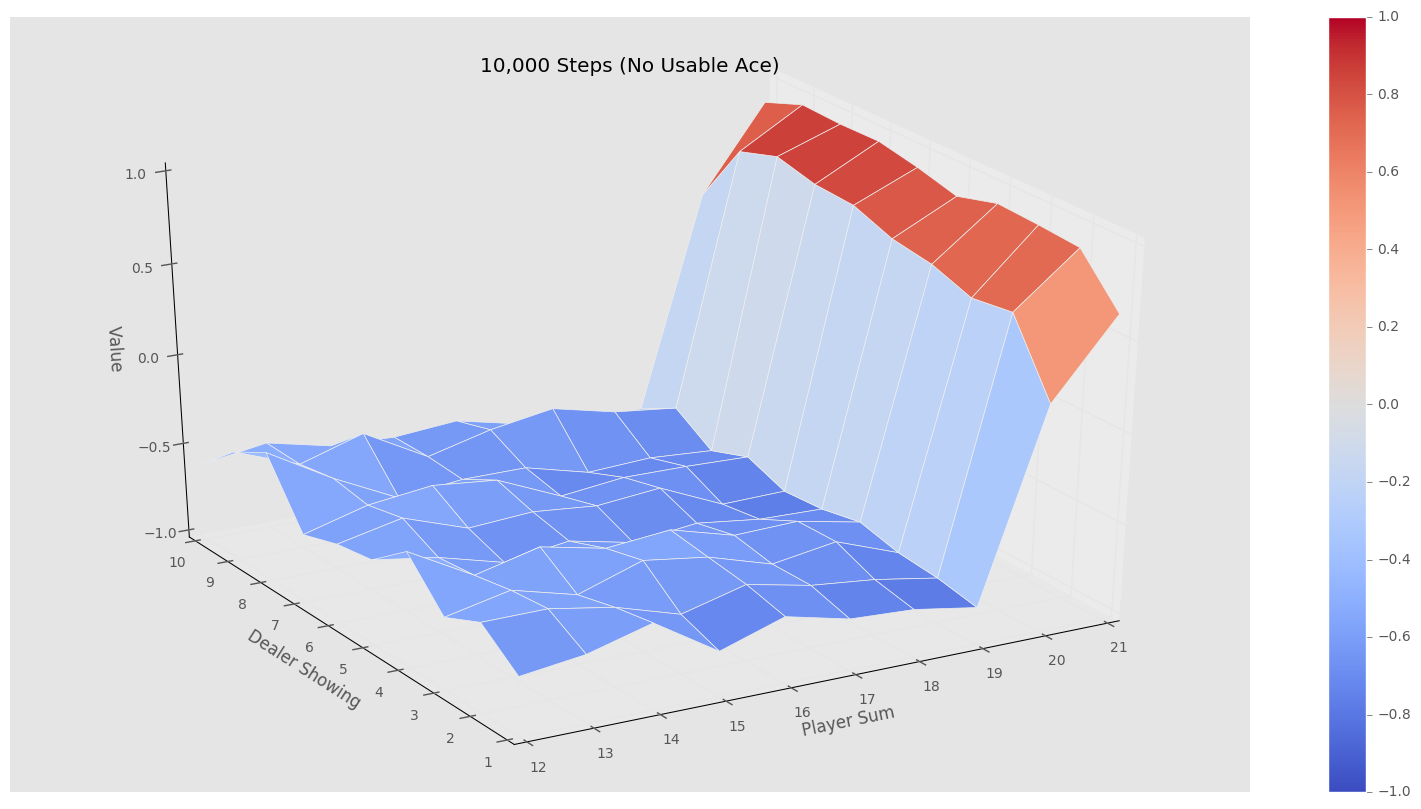

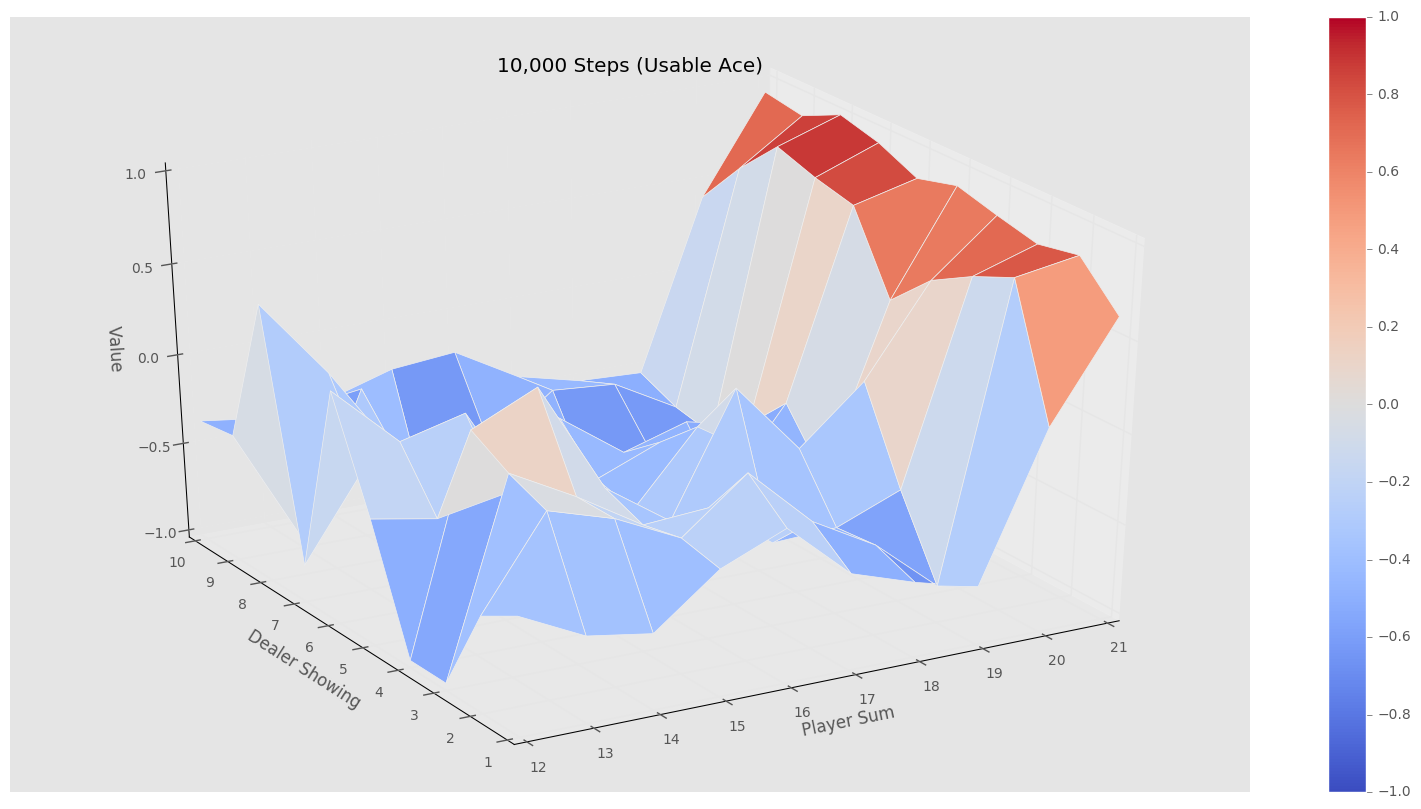

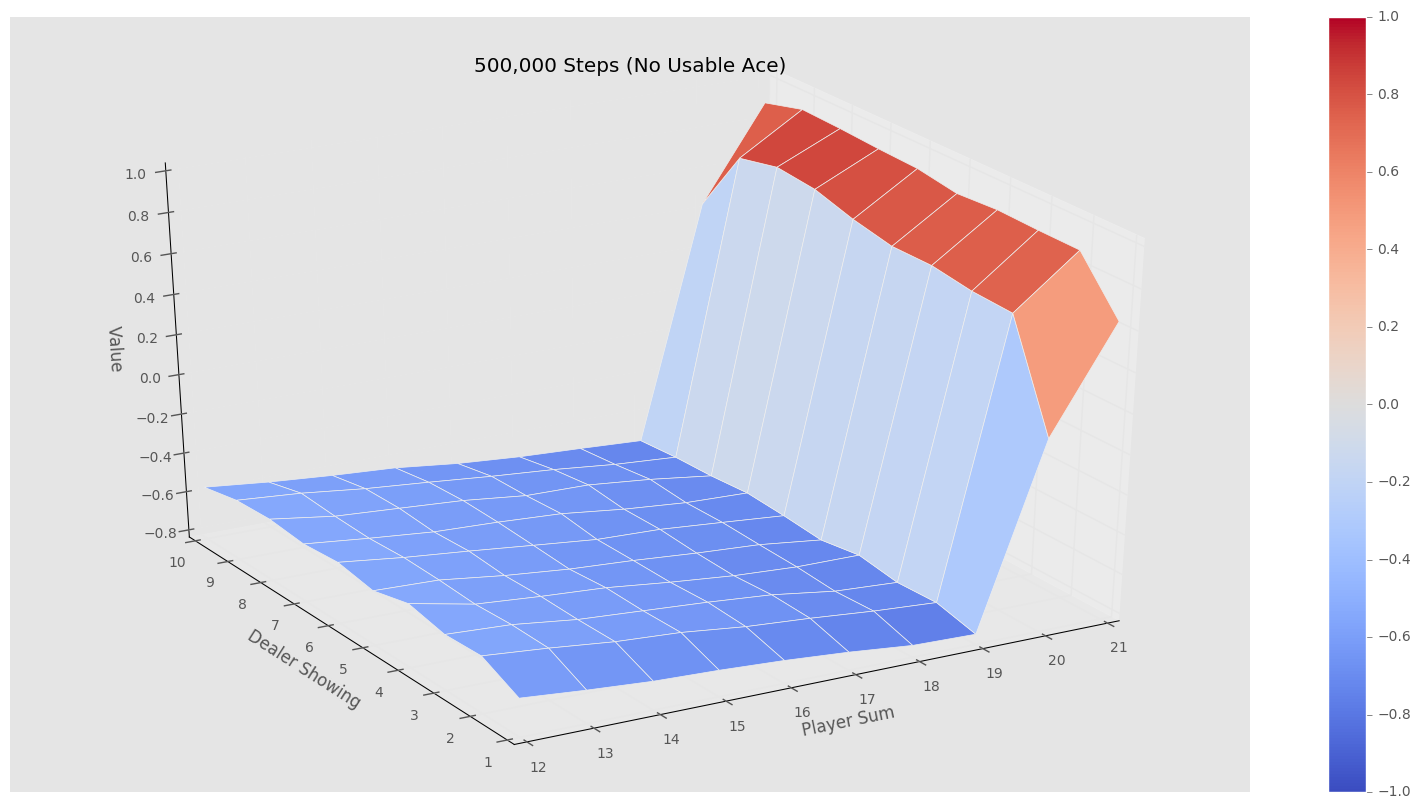

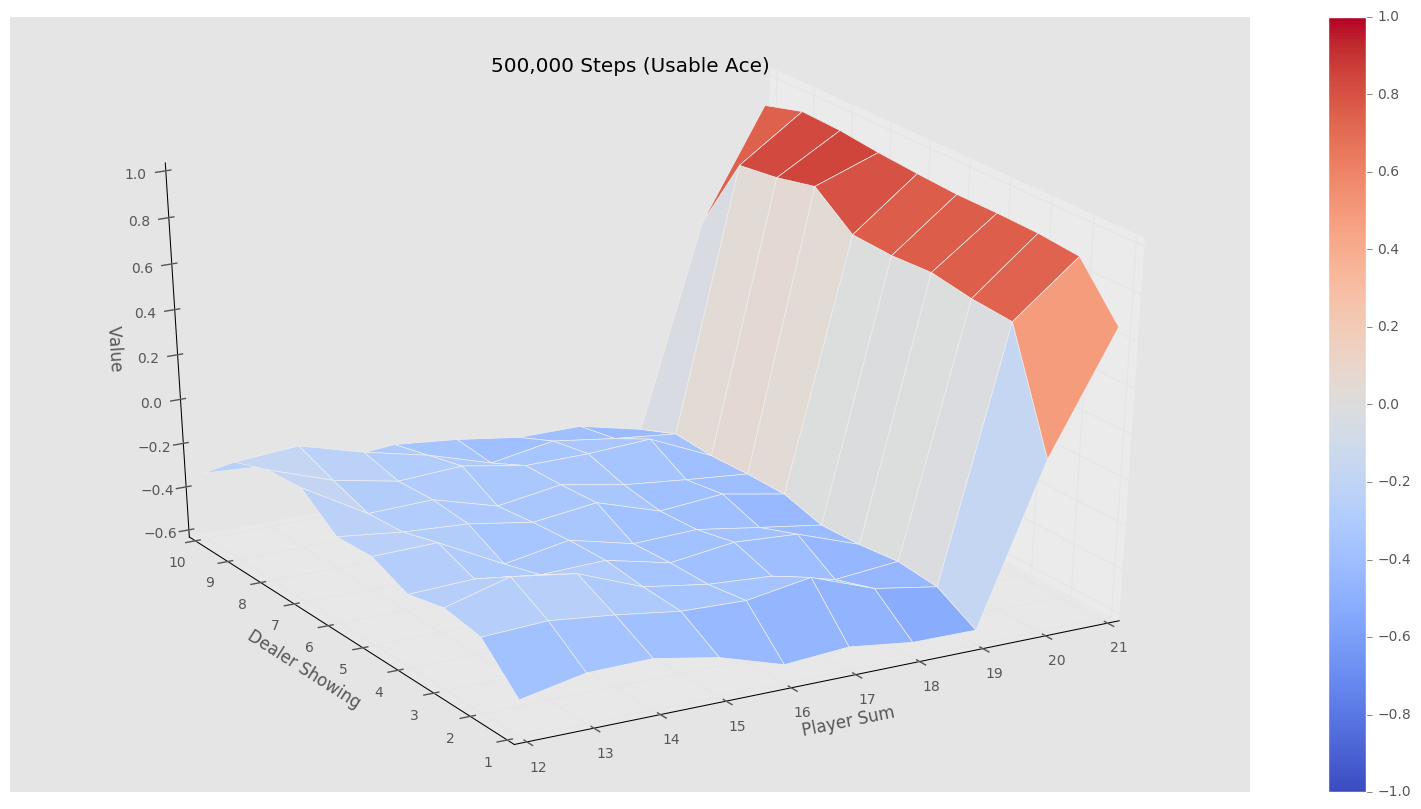

In [35]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")